In [1]:
from google.colab import files 
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
import pandas as pd 
import numpy as np
import io 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv'])) 
print(df)

        valence  year  acousticness  ... release_date  speechiness    tempo
0        0.0594  1921       0.98200  ...         1921       0.0366   80.954
1        0.9630  1921       0.73200  ...         1921       0.4150   60.936
2        0.0394  1921       0.96100  ...         1921       0.0339  110.339
3        0.1650  1921       0.96700  ...         1921       0.0354  100.109
4        0.2530  1921       0.95700  ...         1921       0.0380  101.665
...         ...   ...           ...  ...          ...          ...      ...
170648   0.6080  2020       0.08460  ...   2020-05-29       0.0881  105.029
170649   0.7340  2020       0.20600  ...   2020-10-23       0.0605  137.936
170650   0.6370  2020       0.10100  ...   2020-11-03       0.0809   91.688
170651   0.1950  2020       0.00998  ...   2020-01-17       0.3080   75.055
170652   0.6420  2020       0.13200  ...   2020-10-16       0.1080   94.991

[170653 rows x 19 columns]


To make a popularity prediction on the spotify dataset

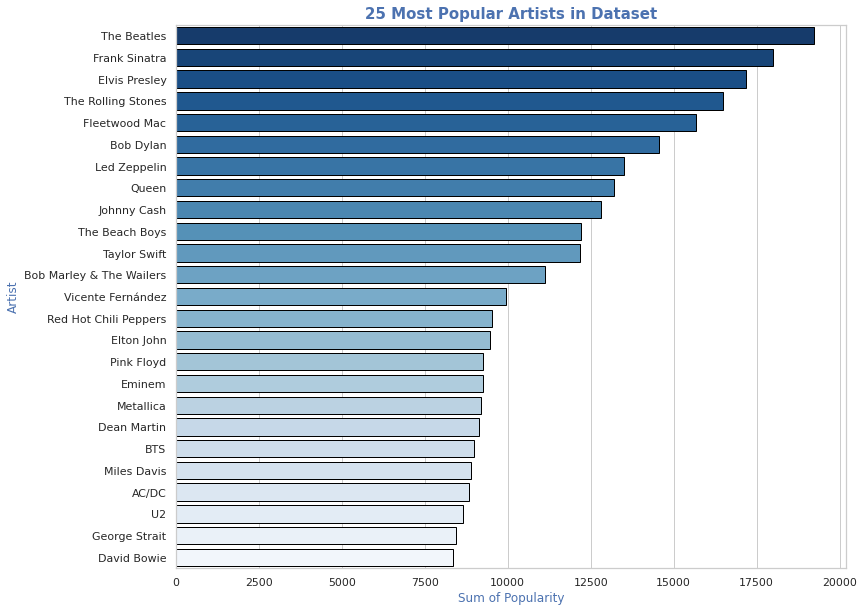

In [16]:
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(25)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues_r", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='b', fontsize=12)
ax.set_ylabel('Artist', c='b', fontsize=12)
ax.set_title('25 Most Popular Artists in Dataset', c='b', fontsize=15, weight = 'bold')
plt.show()

Text(0.5, 0, 'Year')

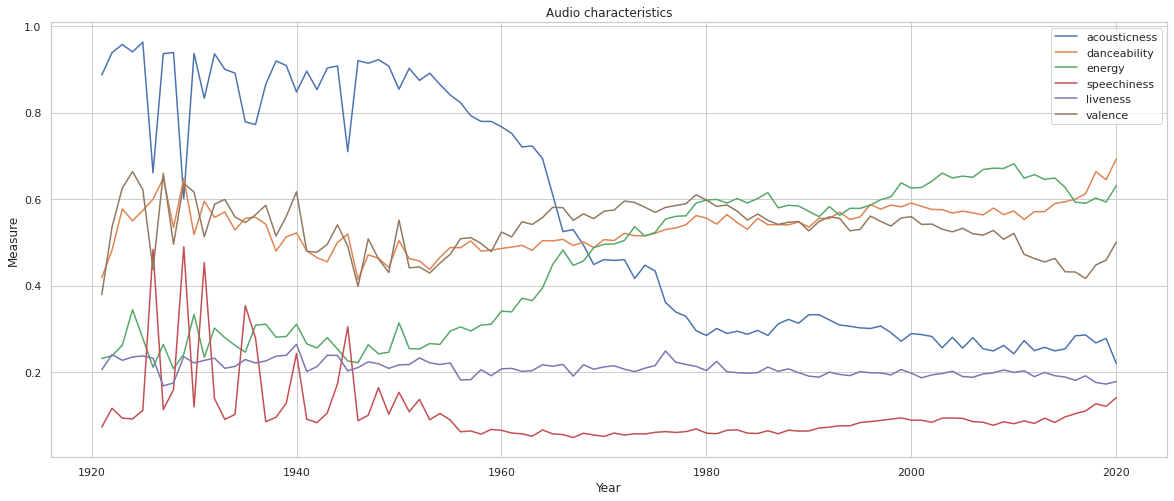

In [17]:
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

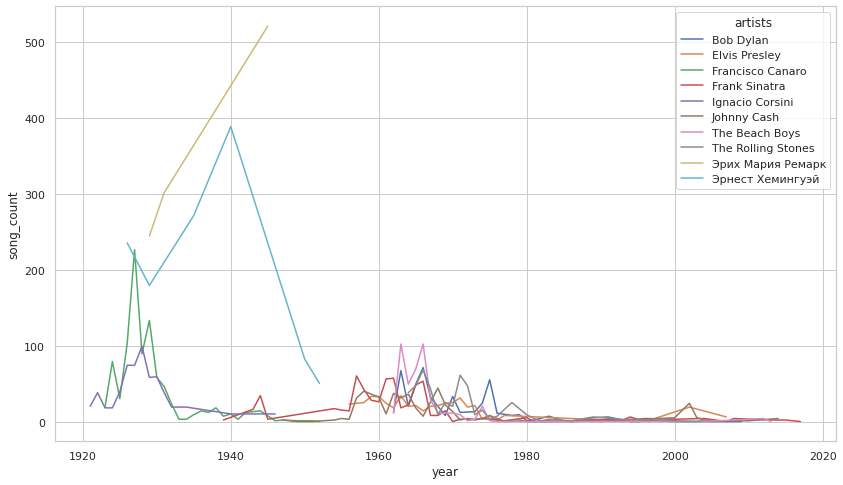

In [18]:
artists_1 = df.artists.value_counts().index[:10]

artists_2 = df[df.artists.isin(artists_1)][["artists","year"]].\
groupby(["artists","year"]).size().reset_index(name="song_count")


plt.figure(figsize=(14,8))
sns.lineplot(x="year", y="song_count", hue="artists", data=artists_2)

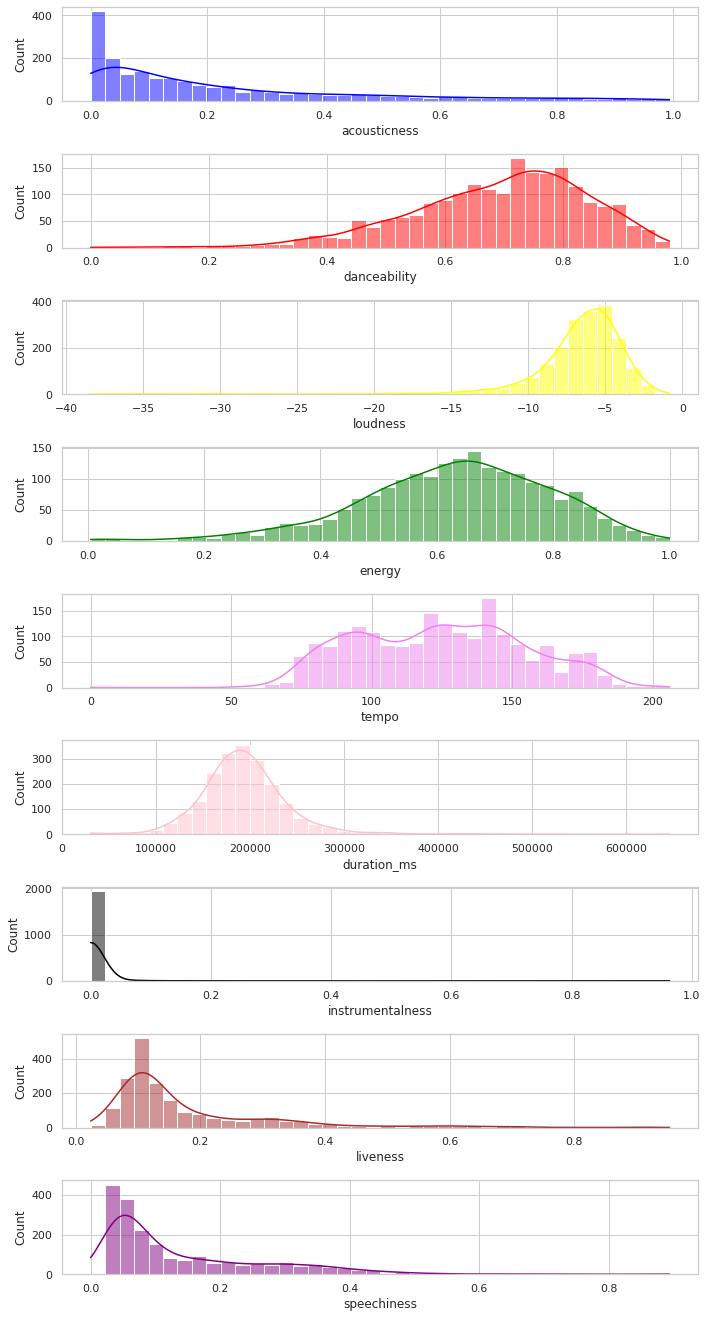

In [26]:
#2020
col=["acousticness","danceability","loudness","energy","tempo","duration_ms","instrumentalness","liveness","speechiness"]  
def hist(data, var, n_rows, n_cols):
    fig=plt.figure(figsize=(10,20))
    col_1=["blue","red","yellow","green","violet","pink","black","brown","purple"]
    for i, var_name in enumerate(var):
        ax=fig.add_subplot(n_rows,n_cols,i+1)

        sns.histplot(data[var_name], label='All values', kde=True, color=col_1[i],bins=40,
             ax=ax)
    fig.tight_layout()
    plt.show()
hist(df.query("year==2020"),col, len(col)+1, 1)

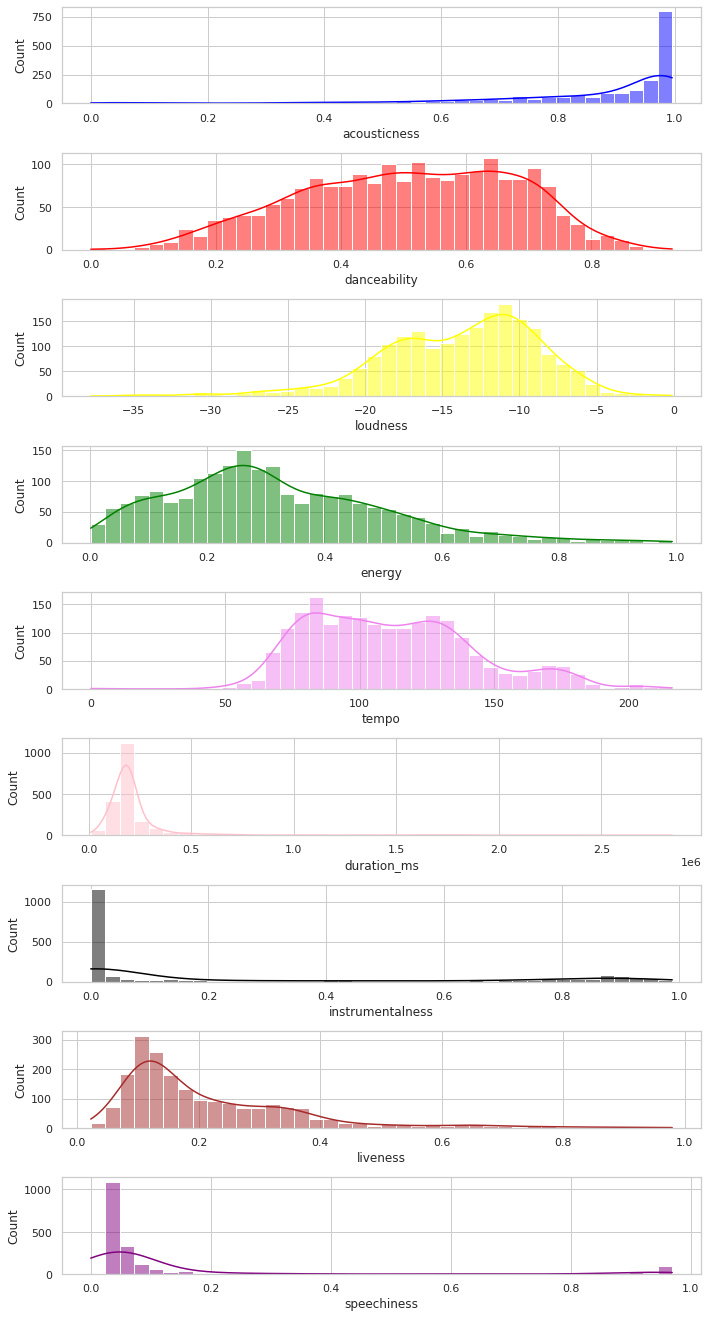

In [27]:
#1950
col=["acousticness","danceability","loudness","energy","tempo","duration_ms","instrumentalness","liveness","speechiness"]  
def hist(data, var, n_rows, n_cols):
    fig=plt.figure(figsize=(10,20))
    col_1=["blue","red","yellow","green","violet","pink","black","brown","purple"]
    for i, var_name in enumerate(var):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data[var_name], label='All values', kde=True, color=col_1[i],bins=40,
             ax=ax)
    fig.tight_layout()
    plt.show()
hist(df.query("year==1950"),col, len(col)+1, 1)

In [14]:
df['artists'] = df['artists'].apply(lambda x: x[1:-1].replace("'", ''))
df['release_date'] = pd.to_datetime(df['release_date'])

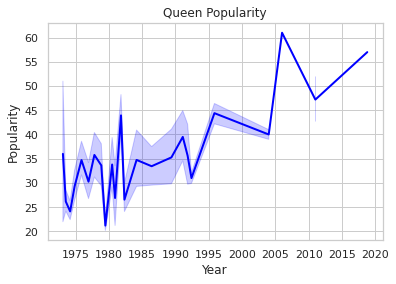

In [15]:
Beatles = df[df['artists'] == 'Queen']
sns.lineplot(x='release_date', y='popularity',lw = 2, data=Beatles, color='blue')
plt.title("Queen Popularity")
plt.ylabel('Popularity')
plt.xlabel('Year')
plt.show()

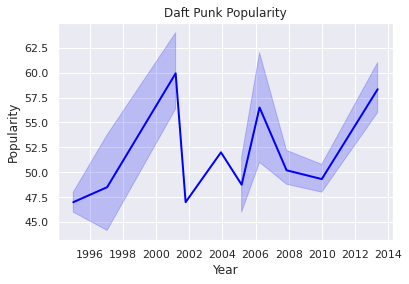

In [ ]:
Beatles = df[df['artists'] == 'Daft Punk']
sns.lineplot(x='release_date', y='popularity',lw = 2, data=Beatles, color='blue')
plt.title("Daft Punk Popularity")
plt.ylabel('Popularity')
plt.xlabel('Year')
plt.show()

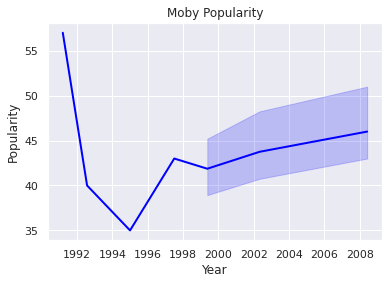

In [ ]:
Beatles = df[df['artists'] == 'Moby']
sns.set(style='darkgrid')
sns.lineplot(x='release_date', y='popularity',lw = 2, data=Beatles, color='blue')
plt.title("Moby Popularity")
plt.ylabel('Popularity')
plt.xlabel('Year')
plt.show()

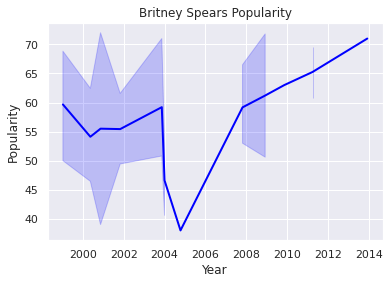

In [ ]:
Beatles = df[df['artists'] == 'Britney Spears']
sns.set(style='darkgrid')
sns.lineplot(x='release_date', y='popularity',lw = 2, data=Beatles, color='blue')
plt.title("Britney Spears Popularity")
plt.ylabel('Popularity')
plt.xlabel('Year')
plt.show()